In [ ]:
#7. zadatak
#Za funkciju prenosa G(s) modela motora jednosmerne struje nacrtati impulsne i odskocne odzive
#sistema za Km=1, Tm1=1, Tm2=5 i Tm3=10.

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy import signal

In [23]:
Km = 1
Tm1 = 1
Tm2 = 5
Tm3 = 10

In [24]:
Gs1 = signal.lti([Km],[Tm1,1])
Gs2 = signal.lti([Km],[Tm2,1])
Gs3 = signal.lti([Km],[Tm3,1])

In [25]:
t1, o1 = Gs1.step()
t2, o2 = Gs2.step()
t3, o3 = Gs3.step()

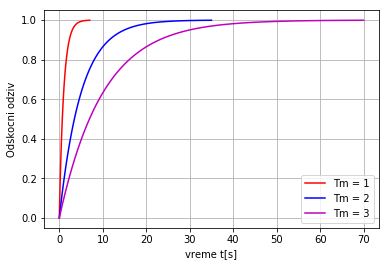

In [26]:
plt.plot(t1, o1, c = 'r', label = "Tm = 1")
plt.plot(t2, o2, c = 'b', label = "Tm = 2")
plt.plot(t3, o3, c = 'm', label = "Tm = 3")
plt.legend()
plt.xlabel("vreme t[s]")
plt.ylabel("Odskocni odziv")
plt.grid()
plt.show()

In [27]:
t1, o1 = Gs1.impulse()
t2, o2 = Gs2.impulse()
t3, o3 = Gs3.impulse()

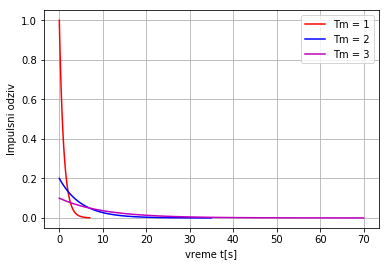

In [28]:
plt.plot(t1, o1, c = 'r', label = "Tm = 1")
plt.plot(t2, o2, c = 'b', label = "Tm = 2")
plt.plot(t3, o3, c = 'm', label = "Tm = 3")
plt.legend()
plt.xlabel("vreme t[s]")
plt.ylabel("Impulsni odziv")
plt.grid()
plt.show()

In [ ]:
#8. zadatak
#Neka je data prenosna fja Gs(s) sistema drugog reda: Gs(s) = Wn^2/(s^2+2*c*Wn*s+Wn^2)
#pri cemu je sa Wn oznacena neprigusena prirodna ucestanost
#a sa c oznacen faktor relativnog prigusenja, c je iz skupa (0,1).
#Na sistem deluje pobuda oblika Hevisajdove funkcije

#a) Za Wn>0 odrediti odziv, oceniti da li je sistem stabilan i odrediti u kojoj poluravni se nalaze polovi sistema, c=0.1
#b) Za Wn<0 odrediti odziv, oceniti da li je sistem stabilan i odrediti u kojoj poluravni se nalaze polovi sistema, c=0.1

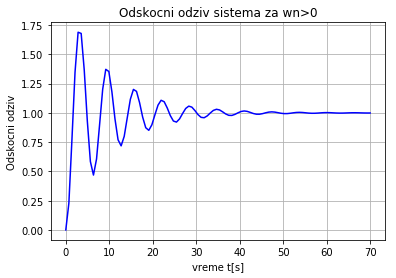

In [71]:
#a)
c = 0.1 #primetiti da ako raste faktor rel. prigusenja tako se smanjuju oscilacije oko stac. tacke i sistem je malo sporiji
wn = 1

Gs = signal.lti([wn**2],[1, 2*c*wn, wn**2])
t, o = Gs.step()

plt.plot(t, o, c = 'b')
plt.title("Odskocni odziv sistema za wn>0")
plt.xlabel("vreme t[s]")
plt.ylabel("Odskocni odziv")
plt.grid()
plt.show()

In [72]:
# dokazujemo da je sistem stabilan tako sto crtamo polove

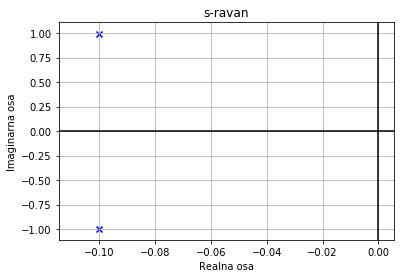

In [73]:
sigme = Gs.poles.real
jomege = Gs.poles.imag

plt.scatter(sigme, jomege, marker = 'x', c = 'b')
plt.title("s-ravan")
plt.xlabel("Realna osa")
plt.ylabel("Imaginarna osa")
plt.axvline(x=0, c = 'k')
plt.axhline(y=0, c = 'k')
#plt.axis([-1,1,-2,2])
plt.grid()
plt.show()

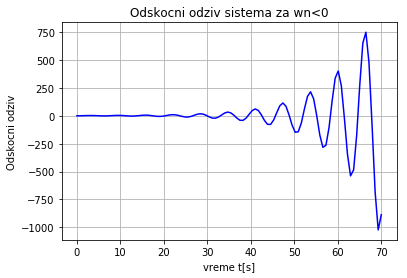

In [74]:
#b)
c = 0.1 #primetiti da ako raste faktor rel. prigusenja tako se smanjuju oscilacije oko stac. tacke i sistem je malo sporiji
wn = -1

Gs = signal.lti([wn**2],[1, 2*c*wn, wn**2])
t, o = Gs.step()

plt.plot(t, o, c = 'b')
plt.title("Odskocni odziv sistema za wn<0")
plt.xlabel("vreme t[s]")
plt.ylabel("Odskocni odziv")
plt.grid()
plt.show()

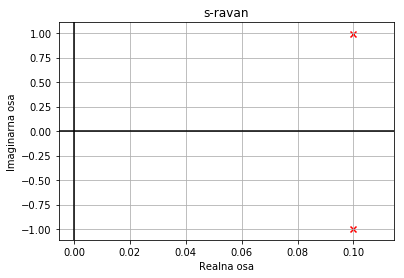

In [75]:
sigme = Gs.poles.real
jomege = Gs.poles.imag

plt.scatter(sigme, jomege, marker = 'x', c = 'r')
plt.title("s-ravan")
plt.xlabel("Realna osa")
plt.ylabel("Imaginarna osa")
plt.axvline(x=0, c = 'k')
plt.axhline(y=0, c = 'k')
#plt.axis([-2,2,-2,2])
plt.grid()
plt.show()

In [ ]:
#Zadatak 1
#Нека је дата преносна функција система аутоматског управљања G(s) као:
#  G(s) = 2*(1/(s+1))
#а) Одредити јединични одскочни одзив овог система, као и његову амплитудску и фазну карактеристику.
#б) Нека је улазни сигнал овог система дефинисан као:
#  r(t) = cos(w*t),  w = 0.1s
#Приказати излазни сигнал c(t) и одредити колико је појачање сигнала r(t).
#***За оне који желе да знају више:
#Приказати како се мења фазни став сигнала c(t) уколико кружна учестаност узима вредности:
#  w = 0.8s, w = 1.3s

# !!! Напомена: Испитивање система вршити на временском одсечку [0,450] s.

In [101]:
Gs = signal.lti([2],[1,1])
t = np.linspace(0,450,1000)

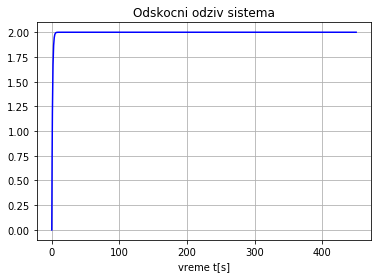

In [102]:
#а)
to, uo = Gs.step(T=t)
plt.plot(to, uo, c = 'b')
plt.title("Odskocni odziv sistema")
plt.xlabel("vreme t[s]")
plt.grid()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


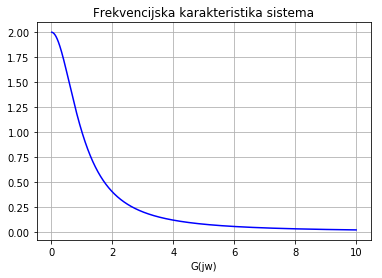

In [109]:
#prvo formiramo frekvencijsku karakteristiku sistema
w, Gjw = Gs.freqresp()
plt.plot(w, Gjw, c = 'b')
plt.title("Frekvencijska karakteristika sistema")
plt.xlabel("w[rad/s]")
plt.xlabel("G(jw)")
plt.grid()
plt.show()

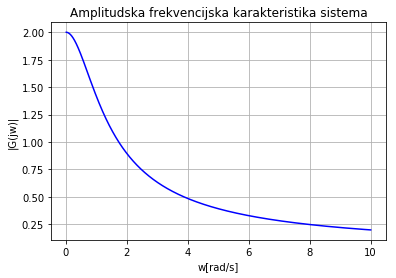

In [111]:
#amplitudska frekvencijska karakteristika
plt.plot(w, np.sqrt(Gjw.real**2 + Gjw.imag**2), c = 'b') #np.absolute(Gjw)
plt.title("Amplitudska frekvencijska karakteristika sistema")
plt.xlabel("w[rad/s]")
plt.ylabel("|G(jw)|")
plt.grid()
plt.show()
#ista je kao gore jer nema negativnih vrednosti

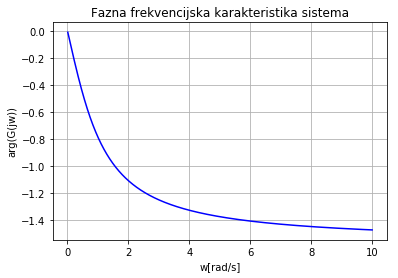

In [113]:
#fazna frekvencijska karakteristika
plt.plot(w, sp.arctan(Gjw.imag/Gjw.real), c = 'b')
plt.title("Fazna frekvencijska karakteristika sistema")
plt.xlabel("w[rad/s]")
plt.ylabel("arg(G(jw))")
plt.grid()
plt.show()

In [106]:
#б)
w = 0.1
r = np.cos(w*t)

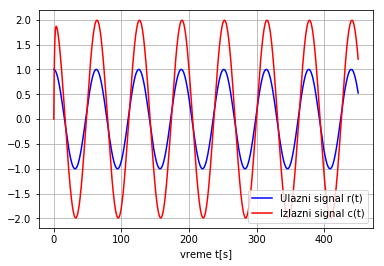

In [107]:
#provlacimo r kroz sistem
tc,c,vps = signal.lsim(Gs,r,t)

plt.plot(t,r, c='b', label = "Ulazni signal r(t)")
plt.plot(tc,c, c='r', label = "Izlazni signal c(t)")
plt.legend()
plt.xlabel("vreme t[s]")
plt.grid()
plt.show()

In [108]:
# racunamo pojacanje na ucestanosti w = 0.1 rad/s

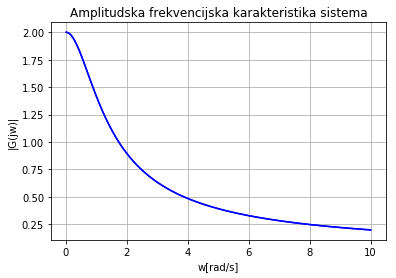

In [145]:
#amplitudska frekvencijska karakteristika ponovo
w, Gjw = Gs.freqresp()
plt.plot(w, np.sqrt(Gjw.real**2 + Gjw.imag**2), c = 'b') #np.absolute(Gjw)

plt.title("Amplitudska frekvencijska karakteristika sistema")
plt.xlabel("w[rad/s]")
plt.ylabel("|G(jw)|")
plt.grid()
plt.show()

In [140]:
max(c)/max(r) #kao sto se vidi i sa slike

1.9897033386091549

In [147]:
w1 = 0.8
r1 = np.cos(w1*t) 
w2 = 1.3
r2 = np.cos(w2*t) 

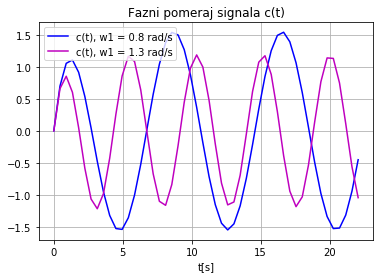

In [152]:
#provlacimo r1 kroz sistem i dobijamo c1
t1,c1,vps1 = signal.lsim(Gs,r1,t)
#provlacimo r2 kroz sistem i dobijamo c2
t2,c2,vps2 = signal.lsim(Gs,r2,t)
#c1 i c2 prikazemo na istom grafiku i ta razlika je fazna promena signala c(t)
plt.plot(t1[:50], c1[:50], c = 'b', label = "c(t), w1 = 0.8 rad/s")
plt.plot(t2[:50], c2[:50], c = 'm', label = "c(t), w1 = 1.3 rad/s")
plt.legend()
plt.title("Fazni pomeraj signala c(t)")
plt.xlabel("t[s]")
plt.grid()
plt.show()

In [ ]:
#Zadatak 2
#Нека је преносна функција система аутоматског управљања G(s) дата као:
#   G(s) = 400*(1/(s^2+k*s+4)), k = 1.1
#а) Одредити одскочни одзив система и време успона.
#б) Одредити време кашњења.
#в) Одредити време смирења.
#г) Одредити фазну и амплитудску фреквенцијску карактеристику одзива система.
#д) Одредити прескок.
#ђ) Погодним одабиром коефицијента k (у коме је садржан фактор релативног пригушења) смањити прескок да буде мањи од 1%.
#е) Одредити пропусни опсег система користећи нову вредност параметра k.

# !!! Напомена: Особине система испитивати на временском одсечку [0,45] s.

In [238]:
k = 1.1
t = np.linspace(0,45,1000)
Gs = signal.lti([400],[1,k,4])

In [ ]:
#а)

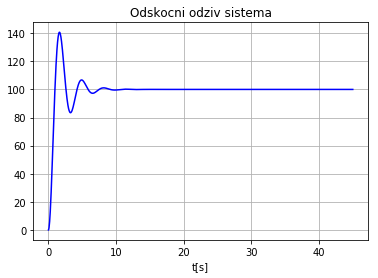

In [194]:
to, uo = Gs.step(T = t)
plt.plot(to,uo, c = 'b')
plt.title("Odskocni odziv sistema")
plt.xlabel("t[s]")
plt.grid()
plt.show()

In [204]:
ustac = uo[-1]
ustac

100.00000000026326

In [215]:
for i in range(len(to)):
    if(uo[i]<=0.1*ustac):
        t01 = to[i]

for i in range(len(t)):
    if(uo[i]<=0.9*ustac):
        t09 = to[i]

print(t01,  t09)

tu = t09 - t01
print("1. Vreme uspona je ", round(tu,3), " s.")

#2. NACIN
tu2 = to[uo <= 0.9*ustac][-1] - to[uo <= 0.1*ustac][-1] #svuda gde je ispunjeno vrati true; prvi zdesna je poslednji true
print("2. Vreme uspona je ", round(tu,3), " s.")

0.225225225225 3.73873873874
1. Vreme uspona je  3.514  s.
2. Vreme uspona je  3.514  s.


In [ ]:
#b)

In [217]:
for i in range(len(to)):
    if(uo[i] <= 0.5*ustac):
        t05 = to[i]
print("1. Vreme kasnjenja je ", round(t05,3), " s.")

t05 = to[uo <= 0.5*ustac][-1]
c

1. Vreme kasnjenja je  0.541  s.
2. Vreme kasnjenja je  0.541  s.


In [ ]:
#v)

In [231]:
uo2 = uo[::-1] #za ts okrecemo nizove x i y i onaj uslov u for petlji proverevamo i break kada naije na prvi van okvira
to2 = to[::-1]
for i in range (0,len(to2)):
     if (sp.absolute(uo2[i]-ustac)<=0.02*ustac):
            ts=to2[i]
     else:
        break
print("Vreme smirenja je ", round(ts,3), " s.")

Vreme smirenja je  6.982  s.


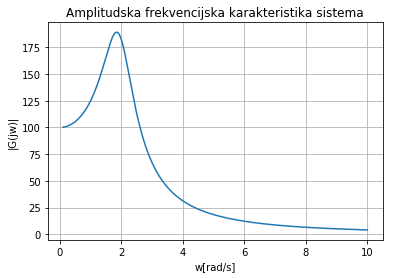

In [240]:
#g)
w, Gjw = Gs.freqresp()

plt.plot(w, np.absolute(Gjw))
plt.title("Amplitudska frekvencijska karakteristika sistema")
plt.xlabel("w[rad/s]")
plt.ylabel("|G(jw)|")
plt.grid()
plt.show()

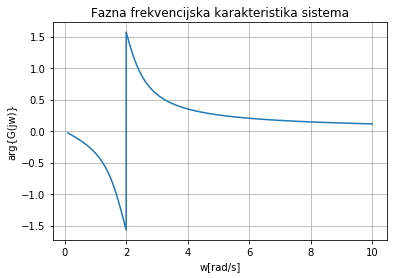

In [242]:
plt.plot(w, np.arctan(Gjw.imag/Gjw.real))
plt.title("Fazna frekvencijska karakteristika sistema")
plt.xlabel("w[rad/s]")
plt.ylabel("arg{G(jw)}")
plt.grid()
plt.show()

In [249]:
#d)
upreskoka = max(uo)
print(upreskoka)

P = ((upreskoka-ustac)/ustac)*100
print("Preskok je ",round(P,2),"% .")

140.702487592
Preskok je  40.7 % .


140.702487592
100.0
0.628659878402


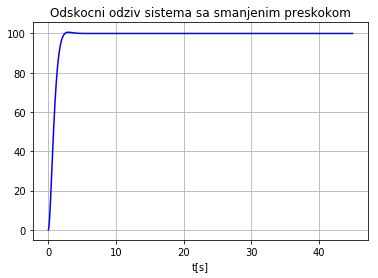

In [265]:
#dj)
knovo = 3.4

Gsnovo = signal.lti([400],[1,knovo,4])

tonovo, uonovo = Gsnovo.step(T = t)

#prvo proverimo preskok

upreskokanovo = max(uonovo)
print(upreskoka)

ustacnovo = uonovo[-1]
print(ustacnovo)

P = ((upreskokanovo-ustacnovo)/ustacnovo)*100
print(P)

plt.plot(tonovo,uonovo, c = 'b')
plt.title("Odskocni odziv sistema sa smanjenim preskokom")
plt.xlabel("t[s]")
plt.grid()
plt.show()

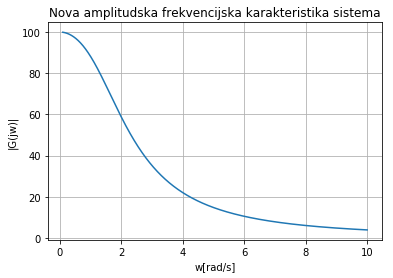

In [275]:
#e)
#|Gjwo| = 1/sqrt(2) * |Gj0|
w, Gjw = Gsnovo.freqresp()

plt.plot(w, np.absolute(Gjw))
plt.title("Nova amplitudska frekvencijska karakteristika sistema")
plt.xlabel("w[rad/s]")
plt.ylabel("|G(jw)|")
plt.grid()
plt.show()

In [280]:
for i in range(len(w)):
    if np.absolute(Gjw[i]) == ((1/np.sqrt(2))*np.absolute(Gjw[0])): #cim naidje na takvo w
        wo = w[i]                                                   #upisuje ga u wo
        break                                                       #i zavrsava
print(round(wo,3))

wo=w[sp.absolute(Gjw[:])>=sp.absolute(Gjw[0])/np.sqrt(2)][-1] 
print(round(wo,3))

1.614
1.614


In [ ]:
# Zadatak 3
#Нека је систем описан функцијом преноса G(s) петог реда:
# G(s) = 64*[(s+6)/(s^2-2*s+4)*(s-8)*(s^2+8*s+40)]
#а) Доказати да је систем описан оваквом функцијом преноса нестабилан.
#б) Не мењајући апсолутне вредности полиномских константи, подесити полове система тако да постане стабилан. Доказати да је овакав систем стабилан.
#в) Функцију преноса под б) апроксимирати функцијом преноса другог реда и приказати квалитет апроксимације. Узети да статичко појачање износи 0,2.

# !!! Напомена: Испитивања система вршити на временском одсечку [0,10] s.

In [153]:
t = np.linspace(0,10,1000)
imenilac = sp.convolve(sp.convolve([1,-2,4],[1,-8]),[1,8,40])
Gs = signal.lti([64,64*6],imenilac)
imenilac

array([    1,    -2,   -20,  -272,   544, -1280])

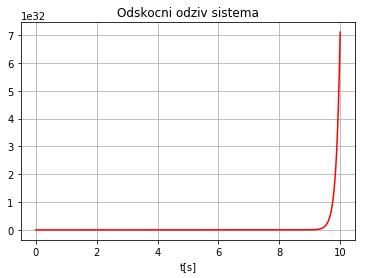

In [154]:
#а)
# vremenski domen, npr pobuda je step fja
to,uo = Gs.step(T=t)
plt.plot(to,uo, c = 'r')
plt.title("Odskocni odziv sistema")
plt.xlabel("t[s]")
plt.grid()
plt.show()

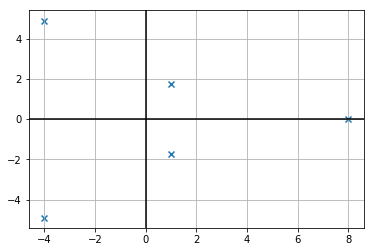

In [162]:
# dokaz preko polova

sigme = Gs.poles.real
jomege = Gs.poles.imag

plt.scatter(sigme,jomege, marker = 'x')

plt.axvline(x = 0, c = 'k')
plt.axhline(y = 0, c = 'k')
plt.grid()
plt.show()

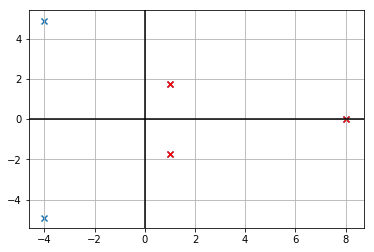

In [161]:
#b)

sigme = Gs.poles.real
jomege = Gs.poles.imag

plt.scatter(sigme,jomege, marker = 'x')
plt.scatter(sigme[sigme>0],jomege[sigme>0], marker = 'x', c = 'r') #one polove koji su desno od Im ose oznacicemo crveno!
plt.axvline(x = 0, c = 'k')
plt.axhline(y = 0, c = 'k')
plt.grid()
plt.show()

In [182]:
#ovi crveni polovi treba da se preslikaju u levo, kao u ogledalu
# u pitanju su izmene ovog dela imenioca :  (s^2-2*s+4)*(s-8)
# -8 -> +8
imenilacNovi = sp.convolve(sp.convolve([1,2,4],[1,8]),[1,8,40])
Gsnovo = signal.lti([64,64*6],imenilacNovi)
imenilac

array([    1,    -2,   -20,  -272,   544, -1280])

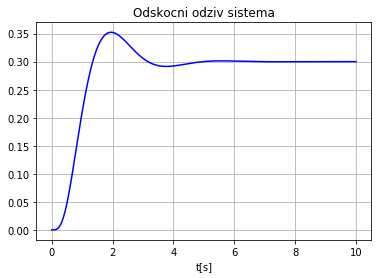

In [188]:
# vremenski domen, npr pobuda je step fja
tonovo,uonovo = Gsnovo.step(T=t)
plt.plot(tonovo,uonovo, c = 'b')
plt.title("Odskocni odziv sistema")
plt.xlabel("t[s]")
plt.grid()
plt.show()

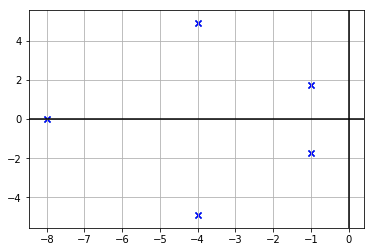

In [187]:
# dokaz preko polova

sigme = Gsnovo.poles.real
jomege = Gsnovo.poles.imag

plt.scatter(sigme,jomege, marker = 'x')
plt.scatter(sigme,jomege, marker = 'x', c = 'b')
plt.axvline(x = 0, c = 'k')
plt.axhline(y = 0, c = 'k')
plt.grid()
plt.show()

In [ ]:
#vidimo da smo sve kriticne polove prebacili i sada je sistem stabilan

In [ ]:
c)

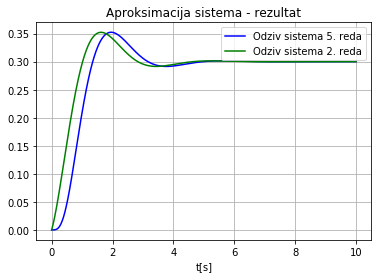

In [190]:
# za aproksimaciju sistema sistemom 2. reda, 2 pola najblza Im osi (konjug. kompleksni par) treba da zadrzimo
# zadrzavamo samo (s^2+2*s+4) u imeniocu, [1,2,4]
# a novo staticko pojacanje je zadato i iznosi 0.2
GsnovoAprox = signal.lti([0.2,0.2*6] ,[1,2,4])

#kvalitet aproksimacije
# vremenski domen, npr pobuda je step fja, staro i novo na istom grafiku
tonovoAprox,uonovoAprox = GsnovoAprox.step(T=t)

plt.plot(tonovo,uonovo, c = 'b', label = "Odziv sistema 5. reda") #staro
plt.plot(tonovoAprox,uonovoAprox, c = 'g', label = "Odziv sistema 2. reda") #novo
plt.legend()
plt.title("Aproksimacija sistema - rezultat")
plt.xlabel("t[s]")
plt.grid()
plt.show()